k means clustering (cluter=collection of data points)

supervised vs unsupervised learning

The algorithm starts with random  k  points as the "centroids" of the clusters and groups all data points. Then, it will move the centroids to the actual centroids of clusters formed. When repeating this process, the centroids stop moving and this marks end of the process.

here well do it for simple bg removal

In [74]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io
import numpy as np
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
RAW_DATA_DIR = PROJECT_ROOT / 'data' / 'raw'
RAW_DATA_DIR.mkdir(parents=True, exist_ok=True)

img_path = RAW_DATA_DIR / 'apple.png' # synth data
image = io.imread(img_path)

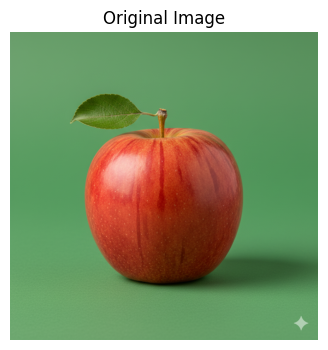

In [75]:
# Display the original image
plt.figure(figsize=(4,4))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [76]:
# Reshape the image to a 2D array of pixels and 3 color channels (RGB)
# (height * width, channels)
rows, cols, channels = image.shape
image_reshaped = image.reshape((rows * cols, channels))

display(f"Original image shape: {image.shape}")
display(f"Reshaped image shape for KMeans: {image_reshaped.shape}")

# How many "features" are there for the data points (pixel)? ->

'Original image shape: (1024, 1024, 4)'

'Reshaped image shape for KMeans: (1048576, 4)'

In [77]:
# Apply K-Means clustering
# We choose n_clusters=2 to separate foreground and background
k = 2
kmeans = KMeans(n_clusters=k) # n_init for robust
# hyperparameters - k, parameters - centroids of clusters (see obsidian)

kmeans.fit(image_reshaped)

# Get the cluster labels for each pixel
# our cluster is labelled as 0, 1 (not binary but because there are 2 clusters), and every pixel is 'assigned' a cluster

labels = kmeans.labels_
display(labels)

# Get the centroids (average color) of each cluster
centers = kmeans.cluster_centers_

display(f"Cluster centers (average RGB values):\n{centers}")

array([0, 0, 0, ..., 0, 0, 0], shape=(1048576,), dtype=int32)

'Cluster centers (average RGB values):\n[[ 96.25232377 152.76637516  97.86453325 255.        ]\n [153.36580197  62.28797971  35.51300512 255.        ]]'

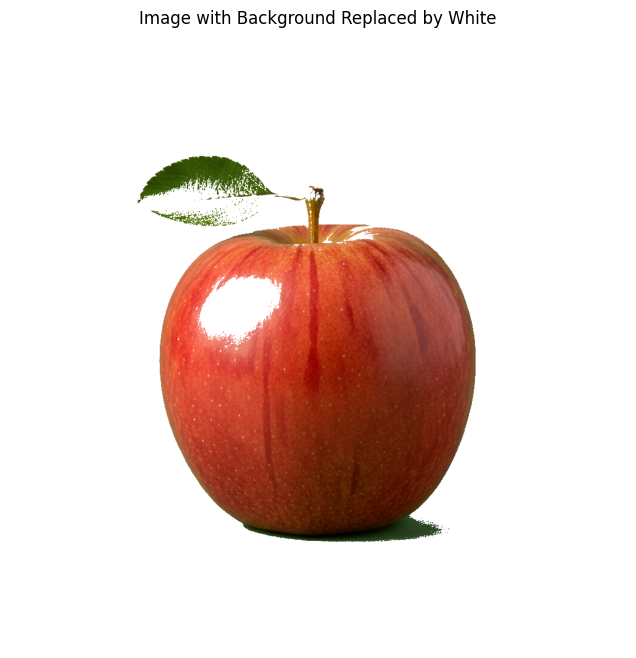

In [78]:
# we can easily see which is bg and fg but a common heuristic is to assume cluster w/ highest avg intensity (sum of rgb) is bg

# Calculate average intensity for each cluster center
intensity = np.sum(centers, axis=1)

# The cluster with the highest intensity is assumed to be the background
background_cluster_idx = np.argmax(intensity)
# here our cls 1 is bg

# Create a mask for the background pixels
background_mask = (labels == background_cluster_idx)
# convert into binary, bg is true other else is false

# Create a copy of the original image to modify
image_no_background = np.copy(image_reshaped)

# Replace background pixels with pure white (RGB: 255, 255, 255)
white_color = np.array([255, 255, 255, 255])
image_no_background[background_mask] = white_color

# Reshape back to the original image dimensions
image_no_background_reshaped = image_no_background.reshape((rows, cols, channels))

plt.figure(figsize=(8, 8))
plt.imshow(image_no_background_reshaped)
plt.title('Image with Background Replaced by White')
plt.axis('off')
plt.show()

In [79]:
# Define colors for each cluster (match k=10)
cluster_colors = (plt.get_cmap('tab10')(np.arange(k)) * 255).astype(np.uint8)

# Create a new image where each pixel is colored according to its cluster label
image_clustered = cluster_colors[labels]

# Reshape the clustered image back to original dimensions
image_clustered_reshaped = image_clustered.reshape((rows, cols, channels))

# Display the image with clustered colors
# plt.figure(figsize=(8, 8))
# plt.imshow(image_clustered_reshaped)
# plt.title('Image with Pixels Colored by Cluster')
# plt.axis('off')
# plt.show()

In [80]:
# for complex image, we might need to manually ask user to select the bg, using algo to find main subj and assume all else is bg (reverse), assuming borders of img are likely to be bg